<a href="https://colab.research.google.com/github/Debanjalee1210/CEN-598-Embedded-Machine-Learning/blob/main/P5_HW_EML_phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import numpy as np

In [64]:
# Define class names for CIFAR-10
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [66]:
x_train.shape

(50000, 32, 32, 3)

In [67]:
x_test.shape

(10000, 32, 32, 3)

In [68]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [69]:
from sklearn.utils import shuffle
x_train,y_train = shuffle(x_train,y_train)
x_test,y_test = shuffle(x_test,y_test)
pivot = int(x_train.shape[0]*0.8)
x_val = x_train[pivot:]
y_val = y_train[pivot:]
x_train = x_train[:pivot]
y_train = y_train[:pivot]
x_train=x_train.reshape(-1,32,32,3)
x_val=x_val.reshape(-1,32,32,3)
x_test=x_test.reshape(-1,32,32,3)
print(x_train.shape,x_val.shape,x_test.shape)
print(y_train.shape,y_val.shape,y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 1) (10000, 1) (10000, 1)


In [70]:
# One-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [76]:
# Define the CNN model
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Add dropout with rate 0.5
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Add dropout with rate 0.5
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [57]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
#print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

In [59]:
# Train the model
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Epoch 1/10
1250/1250 [==============================] - 10s 7ms/step - loss: 1.5334 - accuracy: 0.4375 - val_loss: 1.2410 - val_accuracy: 0.5592
Epoch 2/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.1509 - accuracy: 0.5914 - val_loss: 1.0561 - val_accuracy: 0.6336
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9811 - accuracy: 0.6531 - val_loss: 0.9645 - val_accuracy: 0.6612
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8678 - accuracy: 0.6961 - val_loss: 0.8926 - val_accuracy: 0.6940
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7877 - accuracy: 0.7223 - val_loss: 0.8383 - val_accuracy: 0.7099
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7224 - accuracy: 0.7464 - val_loss: 0.8458 - val_accuracy: 0.7091
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6731 - accuracy: 0.7608 - val_loss: 0.8238 - val_accuracy

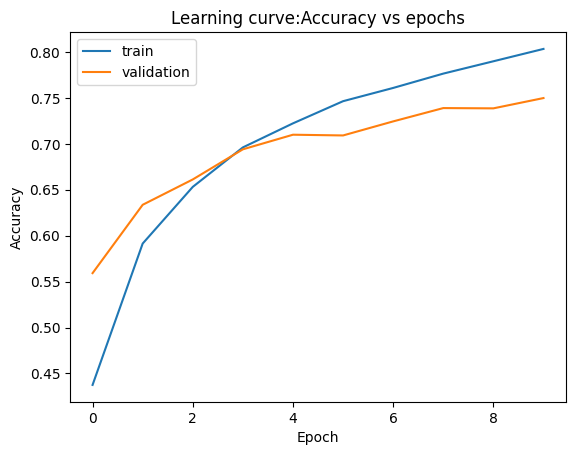

In [60]:
# Evaluate the model
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Learning curve:Accuracy vs epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [61]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.7609 - accuracy: 0.7544
Test accuracy: 0.7544000148773193
